<a href="https://colab.research.google.com/github/Quratulain786/-R-versus-Python-EDA/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling**

1) Build a deep learning model to predict churn rate at bank.

2) Once model is built, print classification report and analyze precision, recall and f1-score

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
# Load Data
df = pd.read_csv("Churn_Modelling.csv")
df.sample(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4463,4464,15778975,Nnonso,850,Germany,Female,70,1,96947.58,3,1,0,62282.99,1
9175,9176,15703413,Montes,519,France,Female,38,7,125328.56,1,1,0,188225.67,0
8904,8905,15737735,Grant,683,Spain,Male,40,4,95053.10,1,1,1,116816.54,1
3159,3160,15680587,Esposito,834,France,Male,23,4,131254.81,1,1,0,20199.30,0
795,796,15686870,Ball,761,Germany,Male,36,8,108239.11,2,0,0,99444.02,0
1441,1442,15688713,McCall,627,Spain,Male,44,6,0.00,1,1,1,114469.55,0
9139,9140,15779904,Yobanna,597,France,Female,29,5,0.00,2,1,1,174825.57,0
9082,9083,15753161,Dickson,768,France,Female,36,5,180169.44,2,1,0,17348.56,0
5181,5182,15711287,Ahmed,661,Spain,Female,35,5,128415.45,1,1,0,142626.49,0
8854,8855,15630857,Wu,674,Spain,Female,39,6,0.00,2,1,1,9574.83,0


First of all, drop customerID and Row No column as it is of no use

In [16]:
#Method -1
#df.drop('CustomerId',axis='columns',inplace=True)
#df. drop('RowNumber',axis='columns',inplace=True)
#df. drop('Surname',axis='columns',inplace=True)
# Method 2
df.drop(["CustomerId","Surname","RowNumber"],axis=1,inplace=True)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.isnull().sum()   # no null value

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
pd.to_numeric(df.Age,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Age, Length: 10000, dtype: bool

In [19]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

WE NEED TO CONVERT THE OBJECT DATA TYPES TO NUMERIC

In [20]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [21]:
geo = pd.get_dummies(df['Geography'],drop_first=True).astype(int)
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [25]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)
df.drop(['Geography'],axis='columns',inplace=True)


KeyError: "['Geography'] not found in axis"

In [26]:
new_df = pd.concat([df,geo], axis='columns')
new_df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [27]:
df.shape

(10000, 10)

In [28]:
new_df.shape

(10000, 12)

In [29]:
new_df.dtypes # all data type is in integer or float

CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Germany              int64
Spain                int64
dtype: object

NOW, THERE IS A NEED TO SCALE ALL THE COLUMN VALUES.

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
colsToScale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
new_df[colsToScale] = sc.fit_transform(new_df[colsToScale])
new_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1


Split the data into train and test

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df.drop(['Exited'],axis='columns') ,new_df['Exited'],test_size=0.2)

len(X_train)

8000

In [46]:
print(" X_train", X_train.shape)
print(" X_test",X_test.shape)
print(" y_train", y_train.shape)
print(" y_test",y_test.shape)

 X_train (8000, 11)
 X_test (2000, 11)
 y_train (8000,)
 y_test (2000,)


# **Contructing Deep Learning Model **


In [47]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5,input_shape=(11,),activation="relu"),
    tf.keras.layers.Dense(3,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ['accuracy']
    )

X_train=np.asarray(X_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)

model.fit(X_train, y_train,epochs=50)

Epoch 1/50
250/250 [==============================] - 4s 4ms/step - loss: 0.4818 - accuracy: 0.7981
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4353 - accuracy: 0.8159
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4183 - accuracy: 0.8273
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4111 - accuracy: 0.8290
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4100 - accuracy: 0.8286
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4085 - accuracy: 0.8304
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4055 - accuracy: 0.8310
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4010 - accuracy: 0.8310
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8319
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3941 - accuracy: 0.8292

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [49]:
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3590 - accuracy: 0.8490


[0.35902664065361023, 0.8489999771118164]

In [50]:
y_predict = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [51]:
model.evaluate(X_test, y_test)


63/63 [==============================] - 0s 6ms/step - loss: 0.3590 - accuracy: 0.8490


[0.35902664065361023, 0.8489999771118164]

In [52]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 3ms/step


array([[0.05666081],
       [0.07438387],
       [0.15721436],
       [0.65005153],
       [0.01678917]], dtype=float32)

In [ ]:
y_test[27]

In [53]:
y_predict = [1 if i >=0.5 else 0 for i in y_predict]


In [ ]:
y_predict[27]

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [55]:
y_predict[:10]

[0, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [58]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1582
         1.0       0.72      0.45      0.55       418

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.83      2000



Text(95.72222222222221, 0.5, 'Truth')

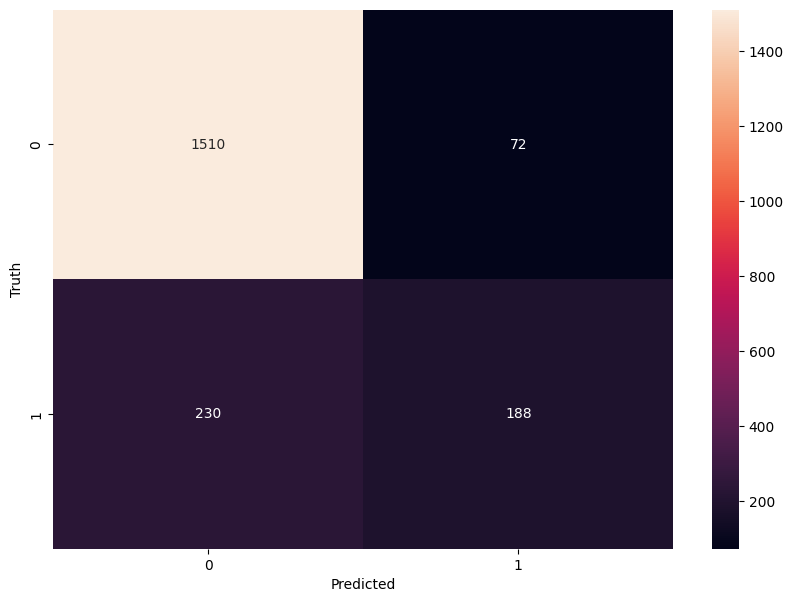

In [59]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
y_test.shape

(2000,)

In [63]:
# Accuracy
round((1510+188)/(1510+188+72+230),2)

0.85

In [68]:
# zerp class
round(1510/(1510+230),2)

0.87

In [69]:
#one class
round(188/(188+72),2)

0.72

In [66]:
# Recall Zero Class
round(1510/(1510+72),2)

0.95

In [70]:
# Recall one Class
round(188/(188+230),2)

0.45